In [ ]:
# LB 259

In [10]:
#import der Libaries
import  pandas as pd
from    prophet import Prophet
import  matplotlib.pyplot as plt



In [12]:

df = pd.read_csv("C:\\Users\\TAABOFA7\\OneDrive - BBBaden\\Schule_Informatik\\Modul_259\\LB\\london_merged.csv")

In [13]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


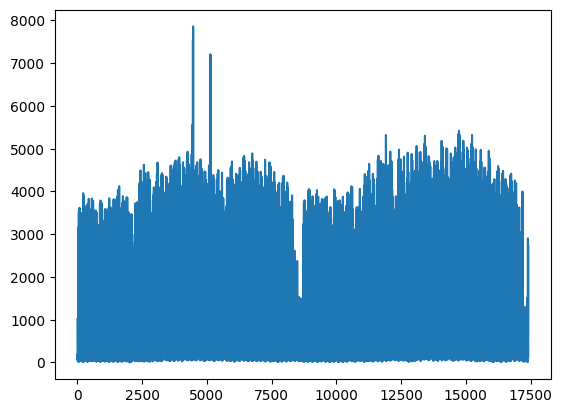

In [14]:
plt.plot(df["cnt"])

In [15]:
df.index = pd.to_datetime(df["timestamp"])

In [17]:
df_day = df.groupby(pd.Grouper(freq = "d")).sum()

In [18]:
df_day

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04,2015-01-04 00:00:002015-01-04 01:00:002015-01-...,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,2015-01-05 00:00:002015-01-05 01:00:002015-01-...,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,2015-01-06 00:00:002015-01-06 01:00:002015-01-...,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0
2015-01-07,2015-01-07 00:00:002015-01-07 01:00:002015-01-...,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0
2015-01-08,2015-01-08 00:00:002015-01-08 01:00:002015-01-...,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-30,2016-12-30 00:00:002016-12-30 01:00:002016-12-...,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0
2016-12-31,2016-12-31 00:00:002016-12-31 01:00:002016-12-...,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0
2017-01-01,2017-01-01 00:00:002017-01-01 01:00:002017-01-...,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0


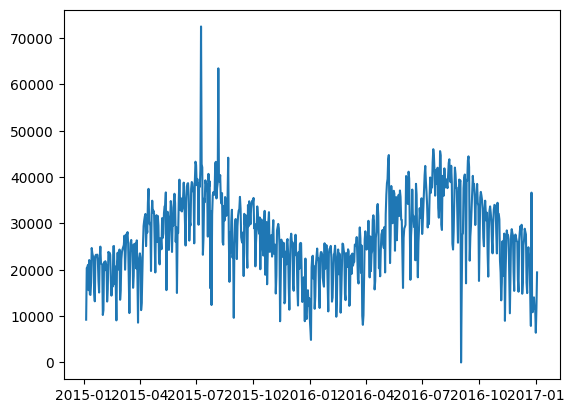

In [19]:
plt.plot(df_day["cnt"])

In [20]:
df_day["ds"], df_day["y"] = df_day.index, df_day["cnt"]

In [21]:
df_day


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,ds,y
timestamp,,,,,,,,,,,,
2015-01-04,2015-01-04 00:00:002015-01-04 01:00:002015-01-...,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,2015-01-04,9234
2015-01-05,2015-01-05 00:00:002015-01-05 01:00:002015-01-...,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,2015-01-05,20372
2015-01-06,2015-01-06 00:00:002015-01-06 01:00:002015-01-...,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,2015-01-06,20613
2015-01-07,2015-01-07 00:00:002015-01-07 01:00:002015-01-...,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0,2015-01-07,21064
2015-01-08,2015-01-08 00:00:002015-01-08 01:00:002015-01-...,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0,2015-01-08,15601
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,2016-12-30 00:00:002016-12-30 01:00:002016-12-...,11566,78.5,25.5,2368.5,216.0,105.0,0.0,0.0,72.0,2016-12-30,11566
2016-12-31,2016-12-31 00:00:002016-12-31 01:00:002016-12-...,11424,178.5,121.0,2183.0,319.5,98.0,0.0,24.0,72.0,2016-12-31,11424
2017-01-01,2017-01-01 00:00:002017-01-01 01:00:002017-01-...,6421,168.0,106.5,2122.5,339.0,150.0,0.0,24.0,72.0,2017-01-01,6421


In [22]:
model = Prophet(daily_seasonality = True)
model.add_country_holidays(country_name="UK")
model.fit(df_day)

11:57:28 - cmdstanpy - INFO - Chain [1] start processing
11:57:29 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future = model.make_future_dataframe(periods = 365)
future.tail()

,ds
1091,2017-12-30
1092,2017-12-31
1093,2018-01-01
1094,2018-01-02
1095,2018-01-03


In [25]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1091,2017-12-30,14735.744072,8064.990452,21392.440172
1092,2017-12-31,14158.727566,7380.989891,20435.946862
1093,2018-01-01,13938.264216,7496.266773,20421.311521
1094,2018-01-02,17799.268766,10783.175665,24158.750285
1095,2018-01-03,21613.480827,15159.274786,27934.133369


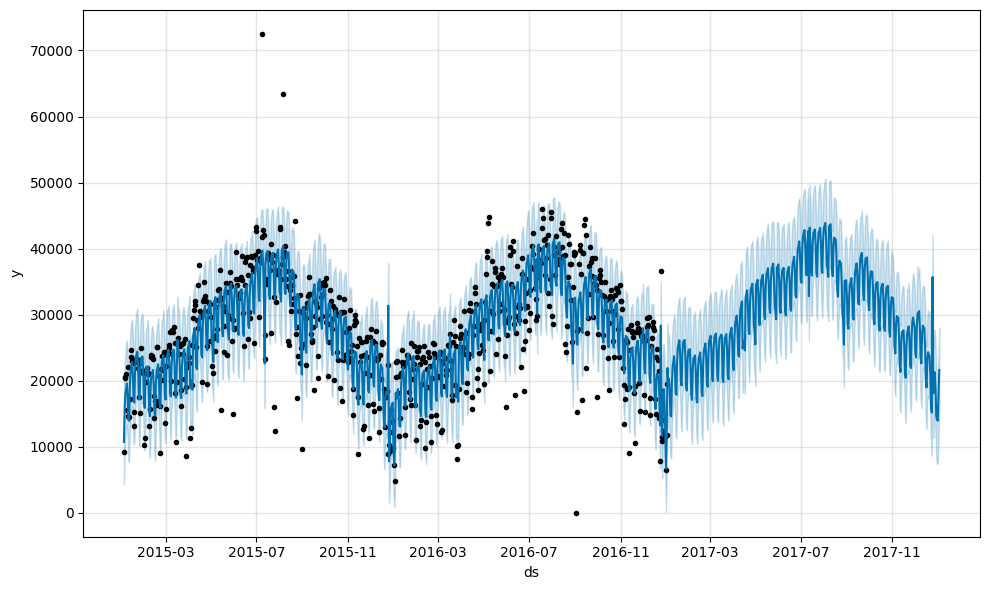

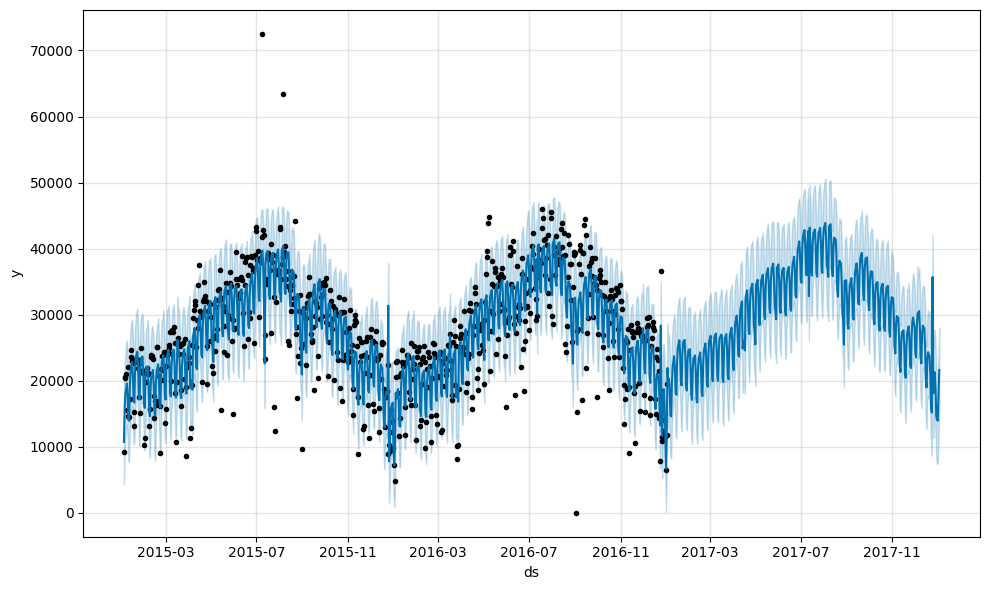

In [26]:
model.plot(forecast)

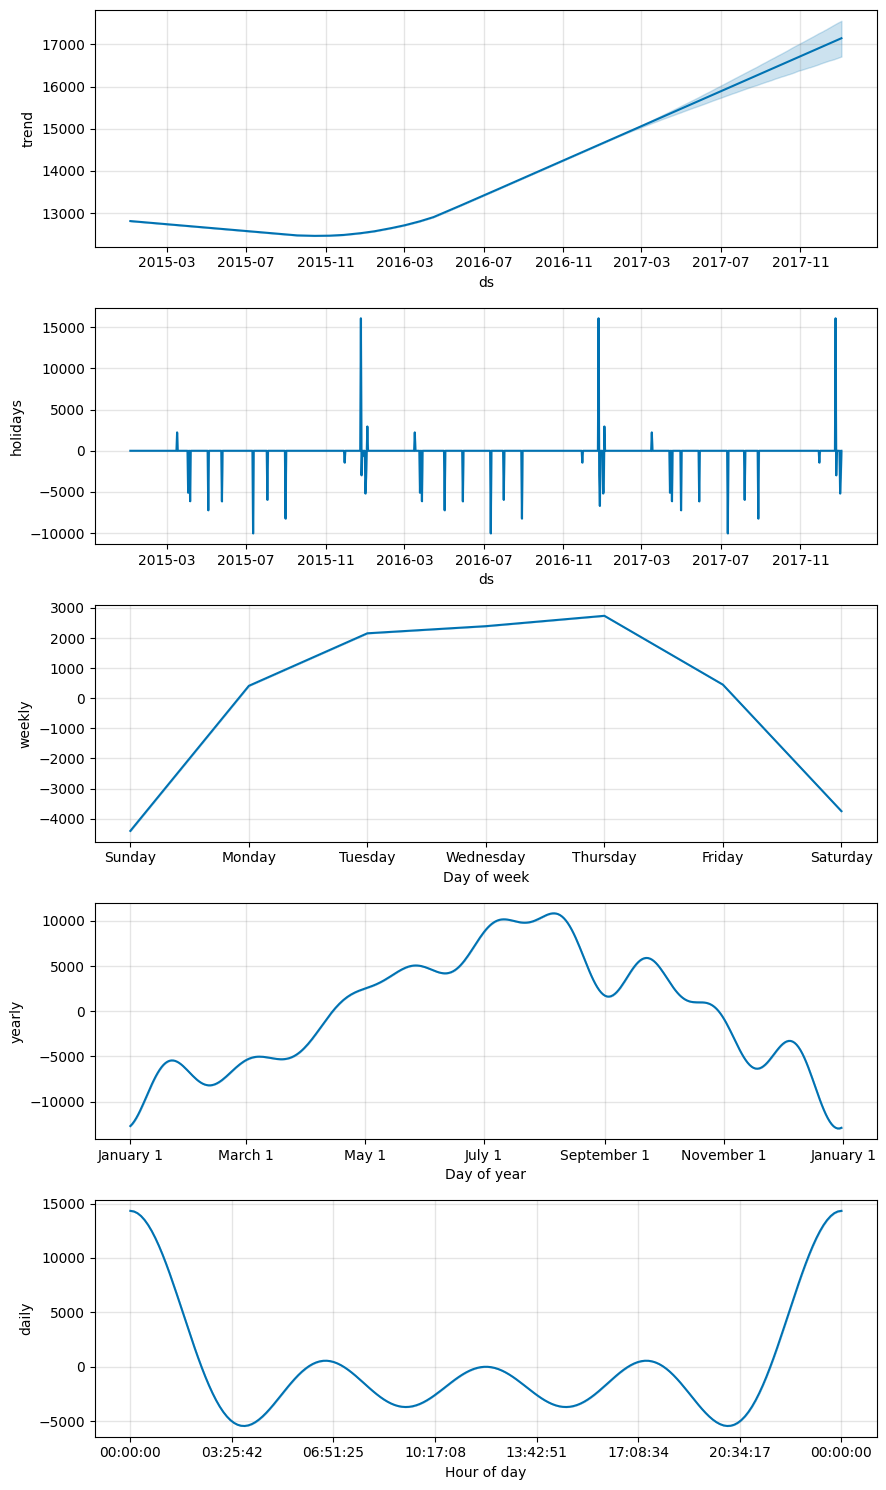

In [27]:
fig = model.plot_components(forecast)